# Can the fertilty rate of a population be predicted by the percentage of women within the population enrolled in education and which level if any, of education has the biggest effect on a population's fertility rate?

## Description

#### The fertility rate trend of a population is likely to be influenced by social factors within the population. Using records from the previous 40 years (1980-2020) this project will attempt to show if it possible to predict a change in region's fertility rate based on the % of females within the region enrolled within education to a specific level.

## Plan

#### Show a correlation between female education level and fertility rate, determine which, if any, level of education is most closely correalated with fertility . To do this:

   * Retrieve data and investigate datasets.
   * Colate datasets in to one, new dataset and clean dataset.
   * Transpose dataset so that education levels are now changed to columns with individual years on the rows.
   * Display regression heatmap
   * Run linear regression for each education column and fertility.
   * Identify the most correalated education level and print the result.
   * Visualise most correalation of most correalated result with a scatter graph and line of best fit. 
   * Visulaise how fertility level and most correalated idependent variable changes over the years 1980 to 2020
    

Code is retreiving the data from the excel sheets to pandas dataframes assigned to descriptive variable names. The excel sheets has data in the first 3 rows that is not required as part of the dataframe so this data is omitted.

Inspect data by looking at first records and getting a summary of the data frames to look at datatypes and see inspect for null values.

In [75]:
import pandas as pd
fertility_level_df = pd.read_excel('fertility rate of females worldbank.xls', sheet_name= "Data",  skiprows=3)
display(fertility_level_df.head())#inspect data, look at first 5 records.
#read and display first 5 rows of data from fertility data execl sheet saved in local files, skip first 3 rows conataining Data source info

tertiary_education_df = pd.read_excel('percentage of females in tertiary education.xls', sheet_name= "Data", skiprows=3)
display(tertiary_education_df.head())
#read and display first 5 rows of data from tertiary education data execl sheet saved in local files, skip first 3 rows conataining Data source info
display(tertiary_education_df.info())#inspect dataframe

secondary_education_df = pd.read_excel('percentage of females in secondary education.xls', sheet_name= "Data", skiprows=3)
display(secondary_education_df.head())
#read and display first 5 rows of data from tertiary education data execl sheet saved in local files, skip first 3 rows conataining Data source info

primary_education_df = pd.read_excel('percentage of females in primary education.xls', sheet_name= "Data", skiprows=3)
display(primary_education_df.head())

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.820000,4.655000,4.471000,4.271000,4.059000,3.842000,...,1.779000,1.795000,1.813000,1.834000,1.854000,1.872000,1.886000,1.896000,1.901000,NaN
1,Africa Eastern and Southern,AFE,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.723308,6.738651,6.752818,6.765400,6.775406,6.783357,...,4.956842,4.882058,4.804516,4.726220,4.647637,4.569675,4.493744,4.420264,4.349433,NaN
2,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.450000,7.450000,7.450000,7.450000,7.450000,7.450000,...,5.770000,5.562000,5.359000,5.163000,4.976000,4.800000,4.633000,4.473000,4.321000,NaN
3,Africa Western and Central,AFW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.439002,6.455523,6.471399,6.487246,6.502619,6.519050,...,5.557872,5.503781,5.446144,5.384336,5.319473,5.251674,5.182391,5.113003,5.044144,NaN
4,Angola,AGO,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.708000,6.790000,6.872000,6.954000,7.036000,7.116000,...,6.120000,6.039000,5.953000,5.864000,5.774000,5.686000,5.600000,5.519000,5.442000,NaN


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"School enrollment, tertiary, female (% gross)",SE.TER.ENRR.FE,NaN,NaN,NaN,NaN,NaN,NaN,...,46.840752,45.585152,22.572399,23.03694,21.37302,20.69792,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"School enrollment, tertiary, female (% gross)",SE.TER.ENRR.FE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,"School enrollment, tertiary, female (% gross)",SE.TER.ENRR.FE,NaN,NaN,NaN,NaN,NaN,NaN,...,1.827240,NaN,NaN,3.48702,NaN,NaN,NaN,4.90508,NaN,NaN
3,Africa Western and Central,AFW,"School enrollment, tertiary, female (% gross)",SE.TER.ENRR.FE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,"School enrollment, tertiary, female (% gross)",SE.TER.ENRR.FE,NaN,NaN,NaN,NaN,NaN,NaN,...,3.322610,NaN,7.847240,NaN,7.40054,8.45325,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 65 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            0 non-null      float64
 5   1961            0 non-null      float64
 6   1962            0 non-null      float64
 7   1963            0 non-null      float64
 8   1964            0 non-null      float64
 9   1965            0 non-null      float64
 10  1966            0 non-null      float64
 11  1967            0 non-null      float64
 12  1968            0 non-null      float64
 13  1969            0 non-null      float64
 14  1970            68 non-null     float64
 15  1971            131 non-null    float64
 16  1972            128 non-null    float64
 17  1973            125 non-null    flo

None

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"School enrollment, secondary, female (% gross)",SE.SEC.ENRR.FE,NaN,NaN,NaN,NaN,NaN,NaN,...,99.731331,112.145752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"School enrollment, secondary, female (% gross)",SE.SEC.ENRR.FE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,"School enrollment, secondary, female (% gross)",SE.SEC.ENRR.FE,NaN,NaN,NaN,NaN,NaN,NaN,...,36.635960,38.107941,37.848492,37.332989,36.75185,37.302528,38.602539,39.998402,NaN,NaN
3,Africa Western and Central,AFW,"School enrollment, secondary, female (% gross)",SE.SEC.ENRR.FE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,"School enrollment, secondary, female (% gross)",SE.SEC.ENRR.FE,NaN,NaN,NaN,NaN,NaN,NaN,...,20.720699,NaN,NaN,NaN,NaN,39.741829,NaN,NaN,NaN,NaN


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"School enrollment, primary, female (% gross)",SE.PRM.ENRR.FE,NaN,NaN,NaN,NaN,NaN,NaN,...,103.718521,105.402817,114.727928,115.204681,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"School enrollment, primary, female (% gross)",SE.PRM.ENRR.FE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,"School enrollment, primary, female (% gross)",SE.PRM.ENRR.FE,NaN,NaN,NaN,NaN,NaN,NaN,...,80.936829,86.328842,85.902138,86.729599,83.504417,82.558357,82.080276,82.85025,NaN,NaN
3,Africa Western and Central,AFW,"School enrollment, primary, female (% gross)",SE.PRM.ENRR.FE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,"School enrollment, primary, female (% gross)",SE.PRM.ENRR.FE,NaN,NaN,NaN,NaN,NaN,NaN,...,92.456367,NaN,NaN,NaN,105.888153,NaN,NaN,NaN,NaN,NaN


The code above shows the data has been retrieved successfully. The dataframes contains data with datatypes objects and floats. The summary tables also show are large volume of null values in data prior to 1975 and provides a list of column headers and number of rows in each dataframe.

The code cell below contains a function which merges the four separate dataframes in to one new dataframe to allow for easier comparison of variables. The code then cleans the data ready for analysis and modifies the layout of the final dataframe so that the data for each variable being assessed, ie. level of education, is contained within an individial column so that comparison between variables and data analysis models can be completed effectively with minimal clean code. 

The function allows for the selection of one country (as 'country_of_interest) from the datasheet to see the results.

In [97]:
def sort_and_clean_data(input1,input2,input3, input4, country_of_interest):
    global df
    df= pd.concat([input1, input2, input3, input4], ignore_index=True)
    # Remove all columns between column index 3 to 24

    df=df[df["Country Name"].str.contains(country_of_interest)]
    #filter country name column for country of interest
    df.drop(df.iloc[:, 3:24], inplace = True, axis = 1)
    # Remove columns 3 to 23 by column index to remove years prior to 1980.
    
    df=df.T
    #transpose dataframe layout

    df.columns = df.iloc[2]
    #assign column headers from index 2 of modified df.

    df = df.iloc[3:]
    #new df omitting first 3 rows

    #df.rename(columns={"Indicator Name" : "Year"}, inplace=True)
    #rename column indicator name to year

    df = df.reset_index()
    #add new index for rows
    df.rename(columns={'index': 'Year'}, inplace=True)
    #rename column called index

    df_new = df.rename(columns={'Indicator Name': ''}, index={'Indicator Name': ''}, inplace=True)
    df.columns.name = None
    df=df.dropna() #remove rows containing null values

    convert_dict = {'Year': int,
                    'Fertility rate, total (births per woman)': float,
                    'School enrollment, tertiary, female (% gross)': float,
                    'School enrollment, secondary, female (% gross)':float,
                    'School enrollment, primary, female (% gross)':float
                   }

    df = df.astype(convert_dict)
    #using dictionary to convert specific columns to different data types
    return df
    
sort_and_clean_data(fertility_level_df, tertiary_education_df, secondary_education_df,primary_education_df, 'European Union')

display(df)
print(df.info())


,Year,"Fertility rate, total (births per woman)","School enrollment, tertiary, female (% gross)","School enrollment, secondary, female (% gross)","School enrollment, primary, female (% gross)"
0,1980,1.869771,20.620119,85.94507,103.1162
1,1981,1.819814,20.924391,86.86786,102.6444
2,1982,1.795595,21.463181,87.17230,102.6041
3,1983,1.749904,22.370110,88.07097,102.2497
4,1984,1.729148,23.035851,88.38976,102.1287
5,1985,1.722600,23.693911,89.21169,102.1789
6,1986,1.709539,24.411751,91.07363,102.3990
7,1987,1.684298,24.944590,91.99312,102.8307
8,1988,1.686863,25.783079,92.38277,102.5725
9,1989,1.650699,27.061100,92.72844,102.3062


<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Year                                            40 non-null     int32  
 1   Fertility rate, total (births per woman)        40 non-null     float64
 2   School enrollment, tertiary, female (% gross)   40 non-null     float64
 3   School enrollment, secondary, female (% gross)  40 non-null     float64
 4   School enrollment, primary, female (% gross)    40 non-null     float64
dtypes: float64(4), int32(1)
memory usage: 1.7 KB
None


The code displays a clean final dataset with each variable assigned to separate column.  The summary table shows that the datatypes have been successfully modified from objects and these are no null values ready for analysis.

The code cell below contains a function which takes the cleaned dataframe and analyses the dataframe to find the most correalated education level with the chosen region's fertility rate by running multiple linear regressions and then identifying the most correalated independent variable, printing the result and then providing visualisations of the results with a scatter graph and line graph.

The function first imports the required libraries to run the regressions and visualise the results. The first visualistion is a correalation matrix allowing the user to visually assess the correalation between variables.

The for loop is used to run linear regressions for each education column against fertility rate and then prints the results and then appends the regression results in to an empty list as dictionaries.

The regression data is converted to a dataframe using the education column heads as indexes and displayed. A sepearate dataframe with the regression results as absolute values is also made and sorted by descending R value to identify the most correalted education level which will be the first result in the dataframe - not displayed.

The if statement will use dataframe with negative/positive values to determine if the most correalated variable's R value is negative or positive and will print the result containing the name of the variable and whether the correalation is negative or positive.

The most correalated column is then plotted against the fertility rate for the data visualisation.

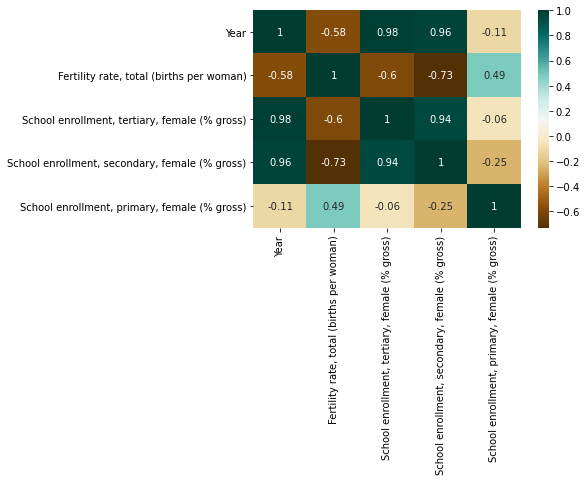

School enrollment, tertiary, female (% gross)
regression slope: -0.0035546211974743147
regression intercept: 1.7397533163180992
regression R2 value: 0.36175576449009
regression P value: 4.0481910695812254e-05
School enrollment, secondary, female (% gross)
regression slope: -0.012092629332742005
regression intercept: 2.7683502478981206
regression R2 value: 0.5314524854496125
regression P value: 9.586507180896447e-08
School enrollment, primary, female (% gross)
regression slope: 0.09540010600084954
regression intercept: -8.167411170437221
regression R2 value: 0.24424947019090548
regression P value: 0.0011899758402174423


,Regression slope,Regression intercept,Regression R value,Regression P value
"School enrollment, tertiary, female (% gross)",-0.003555,1.739753,-0.601461,4.048191e-05
"School enrollment, secondary, female (% gross)",-0.012093,2.768350,-0.729008,9.586507e-08
"School enrollment, primary, female (% gross)",0.095400,-8.167411,0.494216,1.189976e-03


The most correalated independant variable is School enrollment, secondary, female (% gross) which is negatively correalted with the fetility rate of the chosen region.


<AxesSubplot:xlabel='School enrollment, secondary, female (% gross)', ylabel='Fertility rate, total (births per woman)'>

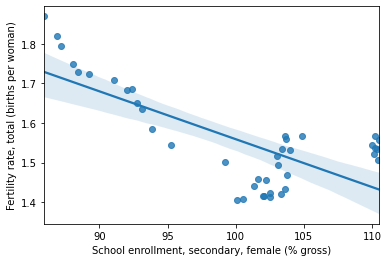

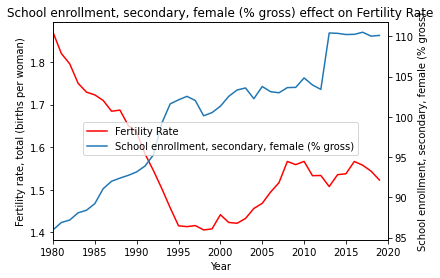

In [98]:
#import seaborn as sns
#import matplotlib.pyplot as plt

def analyse_and_visualise(cleaned_dataframe):
    import seaborn as sns
    import matplotlib.pyplot as plt
    from scipy.stats import linregress
    correlation_matrix = cleaned_dataframe.corr().round(2)
    sns.heatmap(data=correlation_matrix, annot=True, cmap='BrBG')  
    plt.show()
    
    education_columns =['School enrollment, tertiary, female (% gross)' ,'School enrollment, secondary, female (% gross)', 'School enrollment, primary, female (% gross)']
    #list of columns containing education data/IVs
    data1= []
    
    for column in education_columns:
        x=  df[column]
        y=  df["Fertility rate, total (births per woman)"]
        
        regression = (linregress(x,y))
        regression = regression
        #for each education column, run linear regression, print       
        print(column)
        print('regression slope:', float(regression.slope))
        print('regression intercept:', float(regression.intercept))
        print('regression R2 value:', float(regression.rvalue**2))
        print('regression P value:',float(regression.pvalue))
        #for each education column, run linear regression, print results
        
        data = {'Regression slope':float(regression.slope),
        'Regression intercept':float(regression.intercept),
        'Regression R value':float(regression.rvalue),      
        'Regression P value':float(regression.pvalue)}
        data1.append(data)
        linear_regress_df = pd.DataFrame(data, index=[education_columns])
        #append results of linear regression in to empty list 
    linear_regress_df = pd.DataFrame(data1, index=[education_columns])
    linear_regress_df1 = linear_regress_df.astype(float).abs() 
    #use absolute values of R value to allow the most correlated variable to be found regardlesss of negative/positve correalation, not displayed.
    
    linear_regress_df1.sort_values(by=['Regression R value'], inplace=True, ascending=False) #most correlated variable
    display(linear_regress_df)#display linear_regress_df since it contains regressions values with negative/positive values
    
    #df1 as absolute values to find  most correalated value  
    #linear_regress_df keeping negative and postive values so that if statement can identify whether correalation is negative of positive.
    
    most_correalated_iv =linear_regress_df1.index[0]#most correalated is first in dataframe
    most_correalated = str(most_correalated_iv[0])
    #most correalated as string
    
    r_value_most =  float(linear_regress_df.loc[most_correalated, 'Regression R value'])#locate value in column 'Regression R value' in row index of the most correlated variable '
    #if statement will determine negative or positive correalation and print suitable result
    if r_value_most < 0:
         print('The most correalated independant variable is {} which is negatively correalted with the fetility rate of the chosen region.'.format(most_correalated))
    else:
         print('The most correalated independant variable is {} which is positively correalted with the fetility rate of the chosen region.'.format(most_correalated))
    
    #scatter for most correlated IV
    x= cleaned_dataframe[most_correalated]
    y= cleaned_dataframe["Fertility rate, total (births per woman)"]
    display(sns.regplot(x=x, y=y, data= 'cleaned_dataframe'))
    plt.show()

    #plot y-y line graph

    #define variables as columns from cleaned_df
    fertility = cleaned_dataframe['Fertility rate, total (births per woman)']
    education = cleaned_dataframe[most_correalated]
    year = cleaned_dataframe['Year']

    # plot year vs fertility on ax1
    fig, ax1 = plt.subplots()
    ax1.plot(year, fertility, color="red")
    ax1.set_xlabel("Year")
    ax1.set_ylabel("Fertility rate, total (births per woman)")
    ax1.set_title( "{} effect on Fertility Rate".format(most_correalated))

    # create ax2 with shared x-axis, plot year vs most correalted education data
    ax2 = ax1.twinx()
    ax2.plot(year, education)
    ax2.set_ylabel(most_correalated)
    plt.xlim(1980, 2020)

    # set the legend
    fig.legend(['Fertility Rate', most_correalated], loc='center')
    plt.show()

analyse_and_visualise(df)

The python code within this contains a function to anlayse the cleaned data for correalation between fertility rate within a chosen region and the level of education females within the region are enrolled in. Selection of the the European Union as the region of interest shows that  the independent variable 'School enrollment, secondary, female (% gross)' is the most strongly correlated variable to the fertility rate. An increase the percentage of females enrolled within secondary education has a generally negative correalation on the fertility rate from 1980 to 2020, although the line graph does indicate a deviation from this general trend from 1995 onwards suggesting that the percentage of females enrolled within secondary education can no longer be used to predict a change in fertility levels within the European Union.

## Summary

The code within the project demonstrates the use of python code to colate multiple data sets in to one dataset. Python code is used to inspect and clean the dataset by removing null values. The sort and clean function also transposes the datasets for ease of anlaysis later an uses code to change column names and update row indexes.

The second function which analyses the clean dataset demonstrates the ability to run linear regression models and interpret the results. The correlations between variables are also visualised via a seaborn heatmap. The code also demonstrates use of a for loop to run linear regression for each applicable variable and then print the results as a string. The use of lists, dictionaries and pandas dataframes are also used in conjnction with an if statement to identify the most correalted variable and print the result with describing whether the correalation is negative or positive. The project also demonstrates the use of seaborn, scipy.stats and matplot libraries to visualise the results. 

## Datasets
[fertility](https://github.com/nicolej88/programming-for-data-portfolio/blob/main/Data%20Sets/fertility%20rate%20of%20females%20worldbank.xls?raw=true)

[females in tertiary education](https://github.com/nicolej88/programming-for-data-portfolio/blob/main/Data%20Sets/percentage%20of%20females%20in%20tertiary%20education.xls?raw=true)

[females in secondary education](https://github.com/nicolej88/programming-for-data-portfolio/blob/main/Data%20Sets/percentage%20of%20females%20in%20secondary%20education.xls?raw=true)

[females in primary education](https://github.com/nicolej88/programming-for-data-portfolio/blob/main/Data%20Sets/percentage%20of%20females%20in%20primary%20education.xls?raw=true)


#### Datasets taken from[ Worldbank data](https://data.worldbank.org/)